In [6]:
import numpy as np

from made import manifolds, visuals
from made.can import CAN

## Manifold

Create a Manifold and visualize the distance metric over it. 

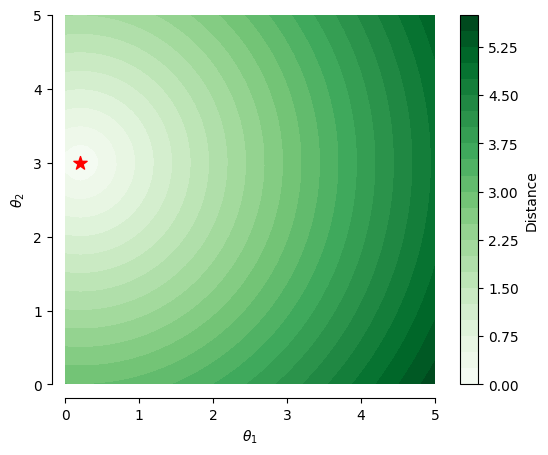

In [7]:
m = manifolds.Plane()

sample = np.array([.2, 3])
assert m.contains(sample), "Sample point is not in the manifold"

f, ax = visuals.plot_lattice(m, show_distances=True, distance_point=sample)


## CAN
Create a CAN and visualize the connnectivity matrix from a few sampled neurons. 

CAN(spacing=0.1, N neurons=625)


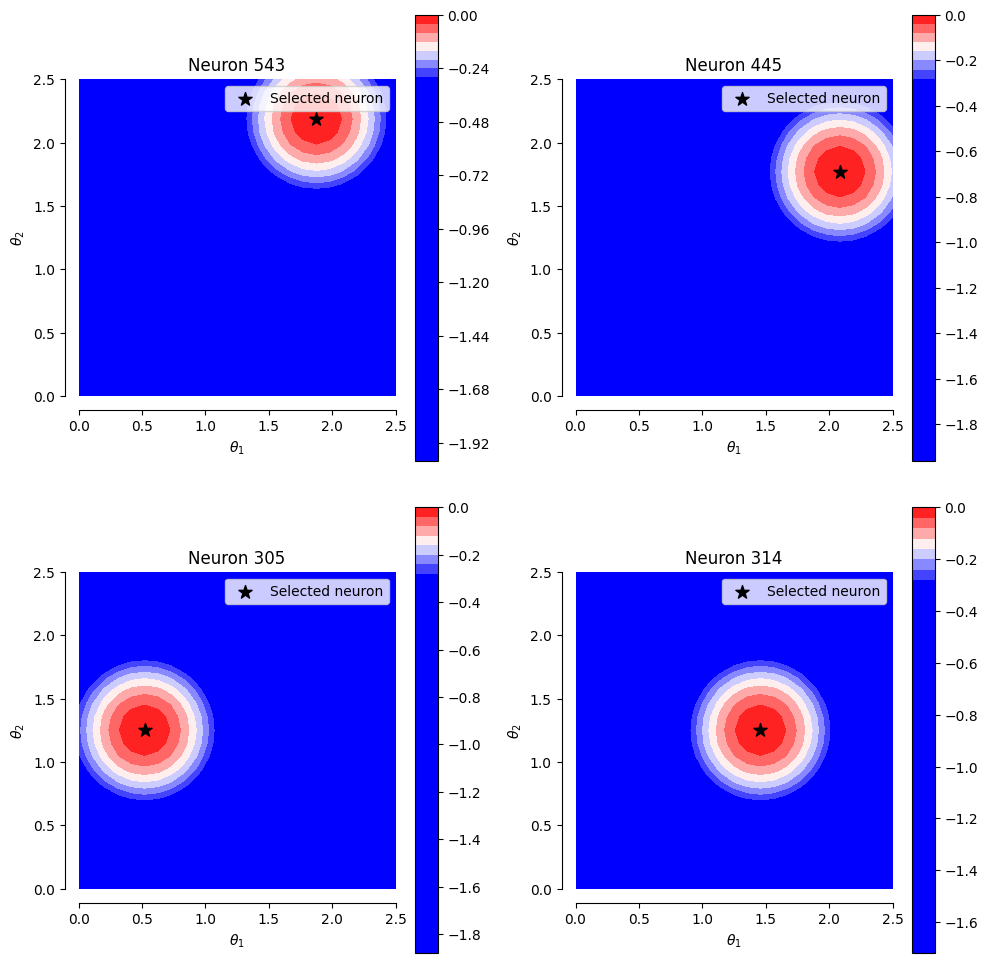

In [10]:
can = CAN.default(topology='Plane')
print(can)
visuals.can_connectivity(can, vmin=-0.3);

## Plot a CAN state
We can simulate the CAN dynamics and visualize the bump over the lattice.

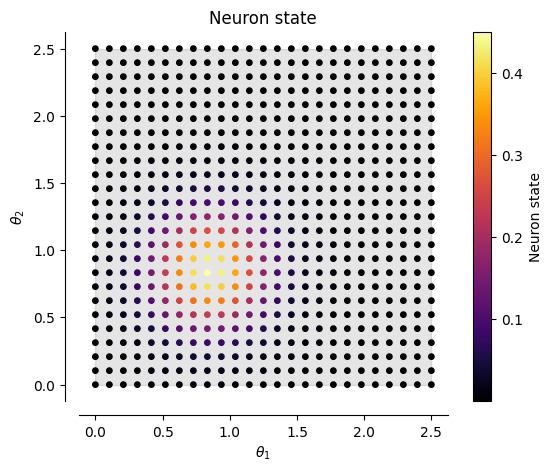

In [11]:
sample_coords = [0, 0]
assert can.manifold.contains(sample_coords), "Sample coordinates not in manifold"

can.reset(mode="point", point=np.array(sample_coords), radius=0.5)
for i in range(250):can()

visuals.plot_can_state(can);